# Introductions:
There are 4 stages in each experiment: A,B,C,D; Each stage has two sections with identical system settings

System settings in the experiment one: 

|Events| A-1 | A-2 | B-1 | B-2 | C-1 | C-2 | D-1 | D-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 5| 5| 6| 6| 2| 2| 3| 3|
|# Misses      | 3| 2| 0| 0| 2| 2| 0| 0|

The experiment two has the same system settings to experiment 1, but in a different order, swapped AB and CD

|Events| C-1 | C-2 | D-1 | D-2 | A-1 | A-2 | B-1 | B-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 2| 2| 3| 3| 5| 5| 6| 6|
|# Misses      | 2| 2| 0| 0| 3| 2| 0| 0|

Each experiment has 18 validate results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.special as ss
from collections import Counter
from IPython.display import display, Markdown, Latex
from sklearn import linear_model, datasets
%matplotlib inline

exp1_data = pd.read_csv("allTogetherSep.csv")
exp2_data = pd.read_csv("allTogetherOct.csv")

exp1_data_T = pd.DataFrame.transpose(exp1_data).reset_index()
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()

n_participant = exp1_data_T.shape[0]

exp1_trust = exp1_data_T.values[1:n_participant,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:n_participant,79:87].astype(int)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)

exp1_attend = exp1_data_T.values[1:n_participant,124:132].astype(int)
exp2_attend = exp2_data_T.values[1:n_participant,124:132].astype(int)
exp_attend = np.vstack((exp1_attend,np.hstack((exp2_attend[:,4:],exp2_attend[:,:4])))).astype(int)

exp1_attend_alert = exp1_data_T.values[1:n_participant,280:288].astype(int)
exp2_attend_alert = exp2_data_T.values[1:n_participant,280:288].astype(int)
exp_attend_alert = np.vstack((exp1_attend_alert,np.hstack((exp2_attend_alert[:,4:],exp2_attend_alert[:,:4])))).astype(int)

exp1_attend_alert_prop = exp1_attend_alert/np.array([17,17,20,20,14,14,17,17])
exp2_attend_alert_prop = exp2_attend_alert/np.array([14,14,17,17,17,17,20,20])
exp_attend_alert_prop = exp_attend_alert/np.array([17,17,20,20,14,14,17,17])

exp1_attendf = exp1_data_T.values[1:n_participant,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:n_participant,214:222].astype(int)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

exp1_attendf_prop = np.divide(exp1_attendf,exp1_attend_alert)
exp2_attendf_prop = np.divide(exp2_attendf,exp2_attend_alert)
exp_attendf_prop = np.divide(exp_attendf,exp_attend_alert)
# zero attended outlier correction
exp1_attendf_prop[6][6] = 0
exp_attendf_prop[6][6] = 0

exp1_check = exp1_data_T.values[1:n_participant,253:261].astype(int)
exp2_check = exp2_data_T.values[1:n_participant,253:261].astype(int)
exp_check = np.vstack((exp1_check,np.hstack((exp2_check[:,4:],exp2_check[:,:4])))).astype(int)

exp1_demo = exp1_data_T.values[1:n_participant,1:8]
exp2_demo = exp2_data_T.values[1:n_participant,1:8]
exp_demo = np.vstack((exp1_demo,exp2_demo)).astype(int)
exp_demo[:,5] += 2  # replace -1,0,1 to 1,2,3

exp1_pstq = exp1_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp2_pstq = exp2_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp_pstq = np.vstack((exp1_pstq,np.hstack((exp2_pstq[:,20:],exp2_pstq[:,:20])))).astype(int)

exp1_prop = exp1_data_T.values[1:n_participant,9:15].astype(int)
exp2_prop = exp2_data_T.values[1:n_participant,9:15].astype(int)
exp_prop = np.vstack((exp1_prop,np.hstack((exp2_prop[:,4:],exp2_prop[:,:4])))).astype(int)

exp1_pgq = exp1_data_T.values[1:n_participant,69:76]
exp2_pgq = exp2_data_T.values[1:n_participant,69:76]
exp_pgq = np.vstack((exp1_pgq,exp2_pgq)).astype(int)

exp1_freq = exp1_data_T.values[1:n_participant,88:92]
exp2_freq = exp2_data_T.values[1:n_participant,88:92]
exp_freq = np.vstack((exp1_freq,np.hstack((exp2_freq[:,2:],exp2_freq[:,:2]))))

exp1_admin = exp1_data_T.values[1:n_participant,94:102].astype(int)
exp2_admin = exp2_data_T.values[1:n_participant,94:102].astype(int)
exp_admin = np.vstack((exp1_admin,np.hstack((exp2_admin[:,4:],exp2_admin[:,:4])))).astype(int)

exp1_admin_w = exp1_data_T.values[1:n_participant,114:122].astype(int)
exp2_admin_w = exp2_data_T.values[1:n_participant,114:122].astype(int)
exp_admin_w = np.vstack((exp1_admin_w,np.hstack((exp2_admin_w[:,4:],exp2_admin_w[:,:4])))).astype(int)

exp1_fnl_balance = exp1_data_T.values[1:n_participant,244:252].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:n_participant,244:252].astype(int)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# correct cards:$4; wrong cards: $4; use (total admin - 2x wrong admin)x$4 to get net profit
exp1_Earnings_admin = 4*(exp1_admin - 2*exp1_admin_w)
exp2_Earnings_admin = 4*(exp2_admin - 2*exp2_admin_w)
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)

# reverse engineering to find total losses from monitoring system
exp1_Total_loss = exp1_fnl_balance - exp1_Earnings_admin - 150
exp2_Total_loss = exp2_fnl_balance - exp2_Earnings_admin - 150
Total_loss = exp_fnl_balance - Earnings_admin - 150

C:\Users\final\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
C:\Users\final\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


# Trust Scores

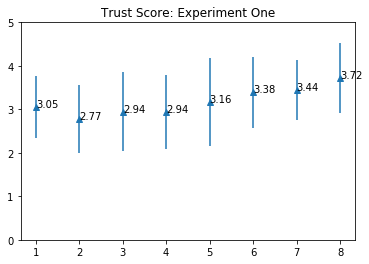

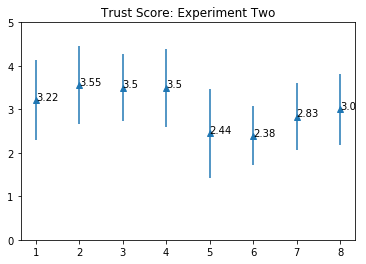

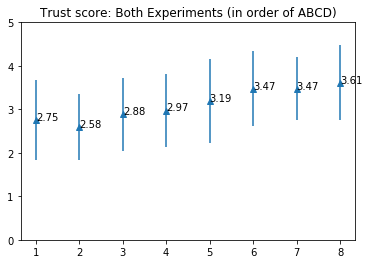

# Number of Events Attended

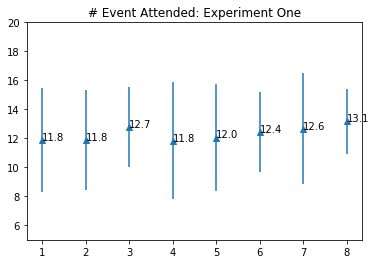

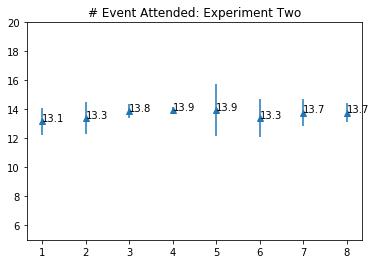

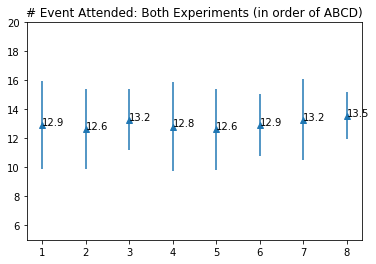

# Number of Alerts Attended

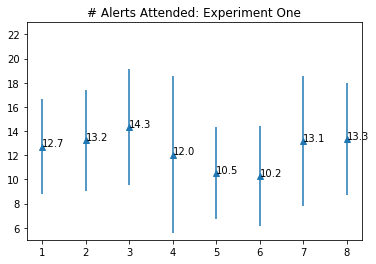

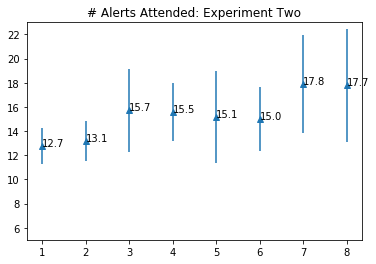

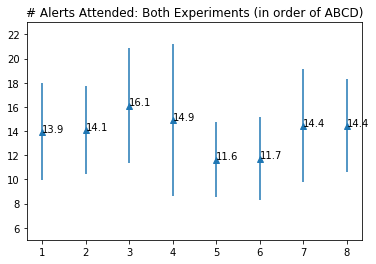

# Proportion of Alerts Attended

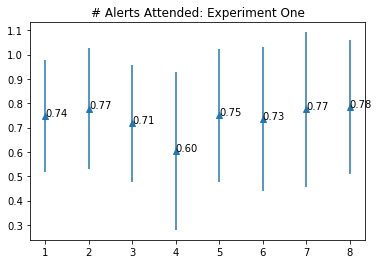

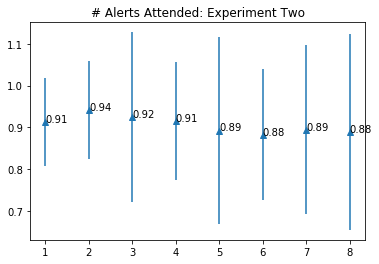

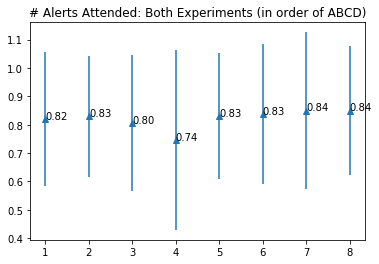

# Number of Check clicked

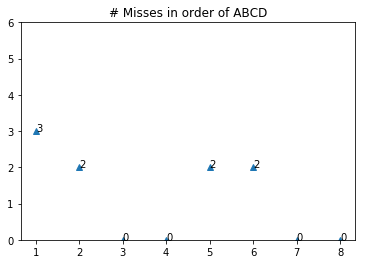

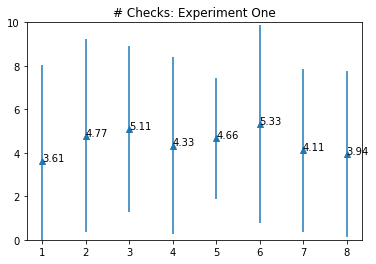

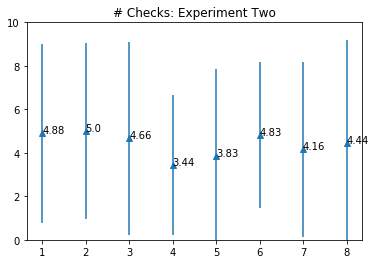

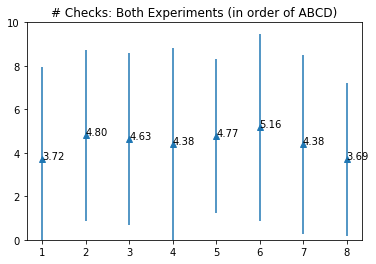

In [2]:
########################### Trust Scores ################################
display(Markdown('# Trust Scores'))

# exp1 mean & std
x = np.arange(1,9)
y = np.array(exp1_trust.mean(axis=0))
e = np.array(exp1_trust.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Trust Score: Experiment One")
plt.show()

# exp2 mean & std
x = np.arange(1,9)
y = np.array(exp2_trust.mean(axis=0))
e = np.array(exp2_trust.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Trust Score: Experiment Two")
plt.show()

# overall mean & std
x = np.arange(1,9)
y = np.array(exp_trust.mean(axis=0))
e = np.array(exp_trust.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Trust score: Both Experiments (in order of ABCD)")
plt.show()

########################### Number of Events Attended ################################
display(Markdown('# Number of Events Attended'))

# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_attend.mean(axis=0))
e = np.array(exp1_attend.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment One")
plt.show()

# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_attend.mean(axis=0))
e = np.array(exp2_attend.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment Two")   
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_attend.mean(axis=0))
e = np.array(exp_attend.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Both Experiments (in order of ABCD)")    
plt.show()

########################### Number of Alerts Attended ################################
display(Markdown('# Number of Alerts Attended'))

# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_attend_alert.mean(axis=0))
e = np.array(exp1_attend_alert.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment One")
plt.show()

# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_attend_alert.mean(axis=0))
e = np.array(exp2_attend_alert.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment Two")   
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_attend_alert.mean(axis=0))
e = np.array(exp_attend_alert.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Both Experiments (in order of ABCD)")    
plt.show()

########################### Proportion of Alerts Attended ################################
display(Markdown('# Proportion of Alerts Attended'))

# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_attend_alert_prop.mean(axis=0))
e = np.array(exp1_attend_alert_prop.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment One")
plt.show()

# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_attend_alert_prop.mean(axis=0))
e = np.array(exp2_attend_alert_prop.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment Two")   
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_attend_alert_prop.mean(axis=0))
e = np.array(exp_attend_alert_prop.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,23])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Both Experiments (in order of ABCD)")    
plt.show()

########################### Number of Check clicked ################################
display(Markdown('# Number of Check clicked'))
# number of misses
x = np.arange(8)+1
y = np.array([3, 2, 0, 0, 2, 2, 0, 0])
e = np.array([0, 0, 0, 0, 0, 0, 0, 0])
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,6])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Misses in order of ABCD")    
plt.show()

# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_check.mean(axis=0))
e = np.array(exp1_check.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment One")
plt.show()

# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_check.mean(axis=0))
e = np.array(exp2_check.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment Two")   
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_check.mean(axis=0))
e = np.array(exp_check.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Both Experiments (in order of ABCD)")    
plt.show()

In [3]:
display(Markdown('# RQ1a Training Effect of very first section'))
display(Markdown('## RQ1a: Trust Scores between first section with same section in the other exp'))
exp_trust_1st_sec = exp1_trust[:, 0].T.ravel()
exp_trust_5th_sec = exp2_trust[:, 4].T.ravel()
print('A-1 Section in exp1: Mean:',exp_trust_1st_sec.mean(),' Std:',exp_trust_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_trust_5th_sec.mean(),' Std:',exp_trust_5th_sec.std())
print(sp.wilcoxon(exp_trust_1st_sec,exp_trust_5th_sec),'\n')
exp_trust_1st_sec = exp2_trust[:, 0].T.ravel()
exp_trust_5th_sec = exp1_trust[:, 4].T.ravel()
print('C-1 Section in exp2: Mean:',exp_trust_1st_sec.mean(),' Std:',exp_trust_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_trust_5th_sec.mean(),' Std:',exp_trust_5th_sec.std())
print(sp.wilcoxon(exp_trust_1st_sec,exp_trust_5th_sec))

display(Markdown('## RQ1a: # Attended Events between first section with same section in the other exp'))
exp_attend_1st_sec = exp1_attend[:, 0].T.ravel()
exp_attend_5th_sec = exp2_attend[:, 4].T.ravel()
print('A-1 Section in exp1: Mean:',exp_attend_1st_sec.mean(),' Std:',exp_attend_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_attend_5th_sec.mean(),' Std:',exp_attend_5th_sec.std())
print(sp.wilcoxon(exp_attend_1st_sec,exp_attend_5th_sec),'\n')
exp_attend_1st_sec = exp2_attend[:, 0].T.ravel()
exp_attend_5th_sec = exp1_attend[:, 4].T.ravel()
print('C-1 Section in exp2: Mean:',exp_attend_1st_sec.mean(),' Std:',exp_attend_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_attend_5th_sec.mean(),' Std:',exp_attend_5th_sec.std())
print(sp.wilcoxon(exp_attend_1st_sec,exp_attend_5th_sec))

display(Markdown('## RQ1a: # Attended Alerts between first section with same section in the other exp'))
exp_attend_alert_1st_sec = exp1_attend_alert[:, 0].T.ravel()
exp_attend_alert_5th_sec = exp2_attend_alert[:, 4].T.ravel()
print('A-1 Section in exp1: Mean:',exp_attend_alert_1st_sec.mean(),' Std:',exp_attend_alert_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_attend_alert_5th_sec.mean(),' Std:',exp_attend_alert_5th_sec.std())
print(sp.wilcoxon(exp_attend_alert_1st_sec,exp_attend_alert_5th_sec),'\n')
exp_attend_alert_1st_sec = exp2_attend_alert[:, 0].T.ravel()
exp_attend_alert_5th_sec = exp1_attend_alert[:, 4].T.ravel()
print('C-1 Section in exp2: Mean:',exp_attend_alert_1st_sec.mean(),' Std:',exp_attend_alert_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_attend_alert_5th_sec.mean(),' Std:',exp_attend_alert_5th_sec.std())
print(sp.wilcoxon(exp_attend_alert_1st_sec,exp_attend_alert_5th_sec))

display(Markdown('## RQ1a: Proportion Attended Alerts between first section with same section in the other exp'))
exp_attend_alert_prop_1st_sec = exp1_attend_alert_prop[:, 0].T.ravel()
exp_attend_alert_prop_5th_sec = exp2_attend_alert_prop[:, 4].T.ravel()
print('A-1 Section in exp1: Mean:',exp_attend_alert_prop_1st_sec.mean(),' Std:',exp_attend_alert_prop_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_attend_alert_prop_5th_sec.mean(),' Std:',exp_attend_alert_prop_5th_sec.std())
print(sp.wilcoxon(exp_attend_alert_prop_1st_sec,exp_attend_alert_prop_5th_sec),'\n')
exp_attend_alert_1st_sec = exp2_attend_alert[:, 0].T.ravel()
exp_attend_alert_5th_sec = exp1_attend_alert[:, 4].T.ravel()
print('C-1 Section in exp2: Mean:',exp_attend_alert_1st_sec.mean(),' Std:',exp_attend_alert_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_attend_alert_5th_sec.mean(),' Std:',exp_attend_alert_5th_sec.std())
print(sp.wilcoxon(exp_attend_alert_1st_sec,exp_attend_alert_5th_sec))

display(Markdown('## RQ1a: # Checks between first section with same section in the other exp'))
exp_check_1st_sec = exp1_check[:, 0].T.ravel()
exp_check_5th_sec = exp2_check[:, 4].T.ravel()
print('A-1 Section in exp1: Mean:',exp_check_1st_sec.mean(),' Std:',exp_check_1st_sec.std())
print('A-1 Section in exp2: Mean:',exp_check_5th_sec.mean(),' Std:',exp_check_5th_sec.std())
print(sp.wilcoxon(exp_check_1st_sec,exp_check_5th_sec),'\n')
exp_check_1st_sec = exp2_check[:, 0].T.ravel()
exp_check_5th_sec = exp1_check[:, 4].T.ravel()
print('C-1 Section in exp2: Mean:',exp_check_1st_sec.mean(),' Std:',exp_check_1st_sec.std())
print('C-1 Section in exp1: Mean:',exp_check_5th_sec.mean(),' Std:',exp_check_5th_sec.std())
print(sp.wilcoxon(exp_check_1st_sec,exp_check_5th_sec))

display(Markdown('# RQ1b Effect of system order'))
display(Markdown('## RQ1b: Trust Scores between first and second section in all stages'))
exp_trust_sec1 = exp_trust[:, np.r_[0,2,4,6]].T.ravel()
exp_trust_sec2 = exp_trust[:, np.r_[1,3,5,7]].T.ravel()
print('1st Section: Mean:',exp_trust_sec1.mean(),' Std:',exp_trust_sec1.std())
print('2nd Section: Mean:',exp_trust_sec2.mean(),' Std:',exp_trust_sec2.std())
print(sp.wilcoxon(exp_trust_sec1,exp_trust_sec2))

display(Markdown('## RQ1b: # Attended Events between first and second section in all stages'))
exp_attend_sec1 = exp_attend[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_sec2 = exp_attend[:, np.r_[1,3,5,7]].T.ravel()
print('1st Section: Mean:',exp_attend_sec1.mean(),' std:',exp_attend_sec1.std())
print('2nd Section: Mean:',exp_attend_sec2.mean(),' std:',exp_attend_sec2.std())
print(sp.wilcoxon(exp_attend_sec1,exp_attend_sec2))

display(Markdown('## RQ1b: # Attended Alerts between first and second section in all stages'))
exp_attend_alert_sec1 = exp_attend_alert[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_alert_sec2 = exp_attend_alert[:, np.r_[1,3,5,7]].T.ravel()
print('1st Section: Mean:',exp_attend_alert_sec1.mean(),' std:',exp_attend_alert_sec1.std())
print('2nd Section: Mean:',exp_attend_alert_sec2.mean(),' std:',exp_attend_alert_sec2.std())
print(sp.wilcoxon(exp_attend_alert_sec1,exp_attend_alert_sec2))

display(Markdown('## RQ1b: Proportion Attended Alerts between first and second section in all stages'))
exp_attend_alert_prop_sec1 = exp_attend_alert_prop[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_alert_prop_sec2 = exp_attend_alert_prop[:, np.r_[1,3,5,7]].T.ravel()
print('1st Section: Mean:',exp_attend_alert_prop_sec1.mean(),' std:',exp_attend_alert_prop_sec1.std())
print('2nd Section: Mean:',exp_attend_alert_prop_sec2.mean(),' std:',exp_attend_alert_prop_sec2.std())
print(sp.wilcoxon(exp_attend_alert_prop_sec1,exp_attend_alert_prop_sec2))

display(Markdown('## RQ1b: #  Checks between first and second section in all stages'))
exp_check_sec1 = exp_check[:, np.r_[0,2,4,6]].T.ravel()
exp_check_sec2 = exp_check[:, np.r_[1,3,5,7]].T.ravel()
print('1st Section: Mean:',exp_check_sec1.mean(),' std:',exp_check_sec1.std())
print('2nd Section: Mean:',exp_check_sec2.mean(),' std:',exp_check_sec2.std())
print(sp.wilcoxon(exp_check_sec1,exp_check_sec2))

# RQ1a Training Effect of very first section

## RQ1a: Trust Scores between first section with same section in the other exp

A-1 Section in exp1: Mean: 3.05555555556  Std: 0.704920974469
A-1 Section in exp2: Mean: 2.44444444444  Std: 1.01227039768
WilcoxonResult(statistic=22.0, pvalue=0.045529285445673709) 

C-1 Section in exp2: Mean: 3.22222222222  Std: 0.916245694582
C-1 Section in exp1: Mean: 3.16666666667  Std: 1.01379375505
WilcoxonResult(statistic=21.5, pvalue=0.90258381265268661)


C:\Users\final\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## RQ1a: # Attended Events between first section with same section in the other exp

A-1 Section in exp1: Mean: 11.8888888889  Std: 3.60383883116
A-1 Section in exp2: Mean: 13.9444444444  Std: 1.77864562151
WilcoxonResult(statistic=9.0, pvalue=0.058511372732785706) 

C-1 Section in exp2: Mean: 13.1666666667  Std: 0.957427107756
C-1 Section in exp1: Mean: 12.0555555556  Std: 3.7189039936
WilcoxonResult(statistic=43.5, pvalue=0.56569506806142933)


## RQ1a: # Attended Alerts between first section with same section in the other exp

A-1 Section in exp1: Mean: 12.7222222222  Std: 3.89879690212
A-1 Section in exp2: Mean: 15.1666666667  Std: 3.78960566697
WilcoxonResult(statistic=17.5, pvalue=0.050090305683375004) 

C-1 Section in exp2: Mean: 12.7777777778  Std: 1.47405546238
C-1 Section in exp1: Mean: 10.5  Std: 3.81881307913
WilcoxonResult(statistic=29.5, pvalue=0.079618742328643161)


## RQ1a: Proportion Attended Alerts between first section with same section in the other exp

A-1 Section in exp1: Mean: 0.748366013072  Std: 0.229340994242
A-1 Section in exp2: Mean: 0.892156862745  Std: 0.22291798041
WilcoxonResult(statistic=18.5, pvalue=0.059017127726984975) 

C-1 Section in exp2: Mean: 12.7777777778  Std: 1.47405546238
C-1 Section in exp1: Mean: 10.5  Std: 3.81881307913
WilcoxonResult(statistic=29.5, pvalue=0.079618742328643161)


## RQ1a: # Checks between first section with same section in the other exp

A-1 Section in exp1: Mean: 3.61111111111  Std: 4.41133500691
A-1 Section in exp2: Mean: 3.83333333333  Std: 4.01732359773
WilcoxonResult(statistic=59.0, pvalue=0.95461606045951108) 

C-1 Section in exp2: Mean: 4.88888888889  Std: 4.13506534798
C-1 Section in exp1: Mean: 4.66666666667  Std: 2.78886675511
WilcoxonResult(statistic=85.0, pvalue=0.98254016442401426)


# RQ1b Effect of system order

## RQ1b: Trust Scores between first and second section in all stages

1st Section: Mean: 3.07638888889  Std: 0.913478251209
2nd Section: Mean: 3.15972222222  Std: 0.9254367921
WilcoxonResult(statistic=779.0, pvalue=0.18940153741777255)


## RQ1b: # Attended Events between first and second section in all stages

1st Section: Mean: 13.0208333333  std: 2.70921460021
2nd Section: Mean: 12.9791666667  std: 2.47618868761
WilcoxonResult(statistic=816.0, pvalue=0.93236187886629929)


## RQ1b: # Attended Alerts between first and second section in all stages

1st Section: Mean: 14.0347222222  std: 4.50526419629
2nd Section: Mean: 13.7986111111  std: 4.64515856252
WilcoxonResult(statistic=2077.5, pvalue=0.67640261447125871)


## RQ1b: Proportion Attended Alerts between first and second section in all stages

1st Section: Mean: 0.826709850607  std: 0.245177106358
2nd Section: Mean: 0.815718370682  std: 0.257642672201
WilcoxonResult(statistic=2121.5, pvalue=0.80613491224276412)


## RQ1b: #  Checks between first and second section in all stages

1st Section: Mean: 4.38194444444  std: 3.98259499395
2nd Section: Mean: 4.51388888889  std: 4.10112808179
WilcoxonResult(statistic=2523.5, pvalue=0.85903723070164606)


In [4]:
display(Markdown('# RQ2 Opinion and self-reported trust vs system performance'))
display(Markdown('## RQ2a Opinion about the system & system performance'))
display(Markdown('### Differences between answers to S3, S4, S7, S8, S9 and System Performance (Hi FA vs Lo FA) '))

Q_id = np.array([3,4,7,8,9])-1

Qs = [
'How often did you attend to the system\'s alerts?',
'How often did you check on the residents?',
'How much do you think this monitoring system needs to improve so you won\'t feel the need to check on residents at all?',
'I can rely on this monitoring system to function properly',
'I know how to use this monitoring system to perform well (even if I don\'t know exactly how it works)',
'I know how to use this monitoring system to take care of the residents (even if I don\'t know exactly how it works)', 
'This monitoring system is dependable',
'I would use such a monitoring system for an elderly family member',
'This monitoring system\'s actions will have a harmful outcome',
'My decisions were the most appropriate ones']

for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,1]].T.ravel()
    pstq_set2 = pstq[:, [2,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with high FA: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections with low FA: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

display(Markdown('## RQ2a Opinion about the system & system performance'))
display(Markdown('### Differences between answers to S3, S4, S7, S9 and System Performance (with/without missed events) – Wilcoxon signed-ranked test'))
for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,2]].T.ravel()
    pstq_set2 = pstq[:, [1,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with misses: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections without misses: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

display(Markdown('## RQ2b Self-reported trust and system performance'))
display(Markdown('### Differences between Trust Scores vs System Performance (Hi FA vs Low FA ratio) – wilcoxon'))

# within subject exp1: high/low false rate

exp1_trust_hifalse = exp1_trust[:, np.r_[0:4]].T.ravel()
exp1_trust_lofalse = exp1_trust[:, np.r_[4:8]].T.ravel()

print('Sections in exp1 with high FA: Mean:', exp1_trust_hifalse.mean(),' Std:',exp1_trust_hifalse.std())
print('Sections in exp1 with low FA: Mean:', exp1_trust_lofalse.mean(),' Std:',exp1_trust_lofalse.std())
print(sp.wilcoxon(exp1_trust_hifalse,exp1_trust_lofalse),'\n')

# within subject exp2: high/low false rate

exp2_trust_hifalse = exp2_trust[:, np.r_[4:8]].T.ravel()
exp2_trust_lofalse = exp2_trust[:, np.r_[0:4]].T.ravel()

print('Sections in exp2 with high FA: Mean:', exp2_trust_hifalse.mean(),' Std:',exp2_trust_hifalse.std())
print('Sections in exp2 with low FA: Mean:', exp2_trust_lofalse.mean(),' Std:',exp2_trust_lofalse.std())
print(sp.wilcoxon(exp2_trust_hifalse,exp2_trust_lofalse),'\n')

# within subject all exps: high/low false rate

exp_trust_hifalse = exp_trust[:, np.r_[0:4]].T.ravel()
exp_trust_lofalse = exp_trust[:, np.r_[4:8]].T.ravel()

print('Sections with high FA: Mean:',exp_trust_hifalse.mean(),' Std:',exp_trust_hifalse.std())
print('Sections with low FA: Mean:',exp_trust_lofalse.mean(),' Std:',exp_trust_lofalse.std())
print(sp.wilcoxon(exp_trust_hifalse,exp_trust_lofalse))

display(Markdown('### Differences between Trust Scores vs System Performance (with/without missed events) – wilcoxon'))
display(Markdown('Exp1: (AC vs BD) (A vs B) (C vs D)'))
# exp1 AC&BD
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1],exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3],exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(AC) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(BD) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')

# exp1 A&B
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3]))

print('Sections(A) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(B) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')
    
# exp1 C&D

# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(C) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std())
print('Sections(D) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std())
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses))

display(Markdown('Exp2: (AC vs BD)'))

exp2_trust_misses = np.hstack((exp2_trust[:,4],exp2_trust[:,5],exp2_trust[:,0],exp2_trust[:,1]))
exp2_trust_nomisses = np.hstack((exp2_trust[:,6],exp2_trust[:,7],exp2_trust[:,2],exp2_trust[:,3]))

print('Sections(AC) with Misses: Mean:',exp2_trust_misses.mean(),' Std:',exp2_trust_misses.std())
print('Sections(BD) without Misses: Mean:',exp2_trust_nomisses.mean(),' Std:',exp2_trust_nomisses.std())
print(sp.wilcoxon(exp2_trust_misses,exp2_trust_nomisses),'\n')

display(Markdown('Combined exps: (ACAC vs BDBD)'))

exp_trust_misses = np.hstack((exp_trust[:,0],exp_trust[:,1],exp_trust[:,4],exp_trust[:,5]))
exp_trust_nomisses = np.hstack((exp_trust[:,2],exp_trust[:,3],exp_trust[:,6],exp_trust[:,7]))

print('Sections with Misses: Mean:',exp_trust_misses.mean(),' Std:',exp_trust_misses.std())
print('Sections without Misses: Mean:',exp_trust_nomisses.mean(),' Std:',exp_trust_nomisses.std())
print(sp.wilcoxon(exp_trust_misses,exp_trust_nomisses),'\n')

# RQ2 Opinion and self-reported trust vs system performance

## RQ2a Opinion about the system & system performance

### Differences between answers to S3, S4, S7, S8, S9 and System Performance (Hi FA vs Lo FA) 

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with high FA: Mean: 3.27777777778  Std: 0.691661088777  Median: 3.0
Sections with low FA: Mean: 2.84722222222  Std: 0.680272049792  Median: 3.0
WilcoxonResult(statistic=75.0, pvalue=2.3129253702380791e-05)


4 I can rely on this monitoring system to function properly
Sections with high FA: Mean: 3.16666666667  Std: 0.866025403784  Median: 3.0
Sections with low FA: Mean: 3.76388888889  Std: 0.790447404174  Median: 4.0
WilcoxonResult(statistic=55.5, pvalue=3.4931357255314674e-06)


7 This monitoring system is dependable
Sections with high FA: Mean: 3.09722222222  Std: 0.930348235612  Median: 3.0
Sections with low FA: Mean: 3.52777777778  Std: 0.816023934532  Median: 4.0
WilcoxonResult(statistic=112.0, pvalue=0.0001422838609300976)


8 I would use such a monitoring system for an elderly family member
Sections with high FA: Mean: 3.0  Std: 1.02740233383  Median:

## RQ2a Opinion about the system & system performance

### Differences between answers to S3, S4, S7, S9 and System Performance (with/without missed events) – Wilcoxon signed-ranked test

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with misses: Mean: 3.15277777778  Std: 0.700391204618  Median: 3.0
Sections without misses: Mean: 2.97222222222  Std: 0.725951908076  Median: 3.0
WilcoxonResult(statistic=286.0, pvalue=0.063939089307543814)


4 I can rely on this monitoring system to function properly
Sections with misses: Mean: 3.41666666667  Std: 0.845740963758  Median: 4.0
Sections without misses: Mean: 3.51388888889  Std: 0.912765266703  Median: 4.0
WilcoxonResult(statistic=162.0, pvalue=0.3161562050651987)


7 This monitoring system is dependable
Sections with misses: Mean: 3.23611111111  Std: 0.905125153341  Median: 3.5
Sections without misses: Mean: 3.38888888889  Std: 0.890623307882  Median: 4.0
WilcoxonResult(statistic=201.0, pvalue=0.12730937393838346)


8 I would use such a monitoring system for an elderly family member
Sections with misses: Mean: 3.13888888889  Std: 1.00423486014

## RQ2b Self-reported trust and system performance

### Differences between Trust Scores vs System Performance (Hi FA vs Low FA ratio) – wilcoxon

Sections in exp1 with high FA: Mean: 2.93055555556  Std: 0.822029819831
Sections in exp1 with low FA: Mean: 3.43055555556  Std: 0.86323662407
WilcoxonResult(statistic=298.5, pvalue=0.00033768795351875271) 

Sections in exp2 with high FA: Mean: 2.66666666667  Std: 0.866025403784
Sections in exp2 with low FA: Mean: 3.44444444444  Std: 0.880165528764
WilcoxonResult(statistic=138.5, pvalue=1.4661349527624673e-07) 

Sections with high FA: Mean: 2.79861111111  Std: 0.854561787564
Sections with low FA: Mean: 3.4375  Std: 0.871769831371
WilcoxonResult(statistic=866.0, pvalue=3.9361456224513951e-10)


### Differences between Trust Scores vs System Performance (with/without missed events) – wilcoxon

Exp1: (AC vs BD) (A vs B) (C vs D)

Sections(AC) with Misses: Mean: 3.09722222222  Std: 0.868583172986
Sections(BD) without Misses: Mean: 3.26388888889  Std: 0.881807732186
WilcoxonResult(statistic=270.5, pvalue=0.12203663647757461) 

Sections(A) with Misses: Mean: 2.91666666667  Std: 0.759202798262
Sections(B) without Misses: Mean: 2.94444444444  Std: 0.880165528764
WilcoxonResult(statistic=100.0, pvalue=0.84021423104873694) 

Sections(C) with Misses: Mean: 3.27777777778  Std: 0.931280811902
Sections(D) without Misses: Mean: 3.58333333333  Std: 0.759202798262
WilcoxonResult(statistic=44.0, pvalue=0.058001211965000389)


Exp2: (AC vs BD)

Sections(AC) with Misses: Mean: 2.90277777778  Std: 1.0159795796
Sections(BD) without Misses: Mean: 3.20833333333  Std: 0.865022478834
WilcoxonResult(statistic=182.0, pvalue=0.0057781171172439569) 



Combined exps: (ACAC vs BDBD)

Sections with Misses: Mean: 3.0  Std: 0.950146187583
Sections without Misses: Mean: 3.23611111111  Std: 0.873897012041
WilcoxonResult(statistic=898.0, pvalue=0.0028003192548645157) 



# RQ3 User behaviour vs system performance

## RQ3a # attended events vs system performance

### Number of Attended Events vs System Performance (Hi FA vs Low FA ratio)

Sections in exp1 with high FA: Mean: 12.0972222222  std: 3.52041554611
Sections in exp1 with low FA: Mean: 12.5833333333  std: 3.22641011377
WilcoxonResult(statistic=199.5, pvalue=0.2265233440190878)
Sections in exp2 with high FA: Mean: 13.5972222222  std: 0.844257106413
Sections in exp2 with low FA: Mean: 13.7222222222  std: 1.24969131991
WilcoxonResult(statistic=137.5, pvalue=0.49544299015719051)
Sections with high FA: Mean: 12.9097222222  std: 2.76363587619
Sections with low FA: Mean: 13.0902777778  std: 2.41210257073
WilcoxonResult(statistic=734.0, pvalue=0.45976100187109026)


### Number of Attended Events vs System Performance (with/without missed events)

Sections in exp1 with Misses: Mean: 12.0694444444  std: 3.4169771765
Sections in exp1 without Misses: Mean: 12.6111111111  std: 3.33148096679
WilcoxonResult(statistic=181.5, pvalue=0.015867411918975085)
Sections in exp2 with Misses: Mean: 13.4722222222  std: 1.35372143678
Sections in exp2 without Misses: Mean: 13.8472222222  std: 0.615984357265
WilcoxonResult(statistic=155.5, pvalue=0.0074203604488517448)
Sections with Misses: Mean: 12.7708333333  std: 2.69185693342
Sections without Misses: Mean: 13.2291666667  std: 2.47408442661
WilcoxonResult(statistic=661.5, pvalue=0.00031940652206522189)


## RQ3a # Proportion of Attended Alerts vs system performance

### Proportion of Attended Alerts vs System Performance (high/low false alert rate)

Sections in exp1 with high FA: Mean: 0.711397058824  std: 0.271187855756
Sections in exp1 with low FA: Mean: 0.760737628385  std: 0.290937429154
WilcoxonResult(statistic=637.0, pvalue=0.090683264399483696)
Sections in exp2 with high FA: Mean: 0.923260971055  std: 0.147013787047
Sections in exp2 with low FA: Mean: 0.889460784314  std: 0.206191848372
WilcoxonResult(statistic=415.0, pvalue=0.48348319953294583)
Sections with high FA: Mean: 0.800428921569  std: 0.256818298231
Sections with low FA: Mean: 0.84199929972  std: 0.244401881868
WilcoxonResult(statistic=1973.5, pvalue=0.041389729388223169)


### Proportion of Attended Alerts vs System Performance (with/without missed events)

Sections in exp1 with Misses: Mean: 0.752567693744  Std: 0.262934019479
Sections in exp1 without Misses: Mean: 0.719566993464  Std: 0.299542759861
WilcoxonResult(statistic=766.5, pvalue=0.63354007828065617)
Sections in exp2 with Misses: Mean: 0.906921101774  Std: 0.158990822643
Sections in exp2 without Misses: Mean: 0.905800653595  Std: 0.198546339282
WilcoxonResult(statistic=379.5, pvalue=0.36779259583827439)
Sections with Misses: Mean: 0.829744397759  Std: 0.230569802413
Sections without Misses: Mean: 0.812683823529  Std: 0.270636289058
WilcoxonResult(statistic=2437.0, pvalue=0.89447162535836877)


## RQ3b Number of checks on residents vs system performance

### Number of checks between high/low false alert rate

Sections in exp1 with high FA: Mean: 4.45833333333  std: 4.22603537609
Sections in exp1 with low FA: Mean: 4.51388888889  std: 3.81878782235
WilcoxonResult(statistic=914.0, pvalue=0.994092552538137)
Sections in exp2 with high FA: Mean: 4.5  std: 4.03112887415
Sections in exp2 with low FA: Mean: 4.31944444444  std: 4.08189222491
WilcoxonResult(statistic=728.0, pvalue=0.56613616369335884)
Sections with high FA: Mean: 4.38888888889  std: 4.15516932251
Sections with low FA: Mean: 4.50694444444  std: 3.92640018864
WilcoxonResult(statistic=3254.0, pvalue=0.70027091120901908)


### Number of checks with/without missed events

Sections in exp1 with Misses: Mean: 4.59722222222  std: 4.16219667638
Sections in exp1 without Misses: Mean: 4.375  std: 3.88529099439
WilcoxonResult(statistic=720.0, pvalue=0.5227473515066704)
Sections in exp2 with Misses: Mean: 4.63888888889  std: 3.93102176269
Sections in exp2 without Misses: Mean: 4.18055555556  std: 4.16775448763
WilcoxonResult(statistic=567.5, pvalue=0.13022985556804142)
Sections with Misses: Mean: 4.61805555556  std: 4.04831331095
Sections without Misses: Mean: 4.27777777778  std: 4.03017170237
WilcoxonResult(statistic=2555.5, pvalue=0.13657196507066791)


### Number of checks vs missed events in the previous segment.

Wilcoxon signed-ranked test for number of checks in consecutive segments.

Exp1: Sec 1  Mean: 3.61111111111  Std: 4.41133500691
Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
WilcoxonResult(statistic=36.5, pvalue=0.18082396332783868) 

Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807
Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
WilcoxonResult(statistic=40.5, pvalue=0.7242514885299367) 

Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705
Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
WilcoxonResult(statistic=30.5, pvalue=0.2922869621254035) 

Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202
Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511
WilcoxonResult(statistic=57.0, pvalue=0.56510600510745002) 

Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511
Exp1: Sec 6  Mean: 5.33333333333  Std: 4.55826477706
WilcoxonResult(statistic=39.0, pvalue=0.64381389671128475) 

Exp1: Sec 6  Mean: 5.33333333333  Std: 4.55826477706
Exp1: Sec 7  Mean: 4.11111111111  Std: 3.75483227749
WilcoxonResult(statistic=38.5, pvalue=0.12358778668842554) 

Ex

C:\Users\final\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


### plots for number of checks in consecutive segments.

#miss 3
#check_c [ 1 10 11  4 14  5  0  6  2  1  8  0  3 13  0  4  2  2]
#check_p [ 0  1 10  1 14  0  0  0  8  2  5  3 10  9  0  2  0  0]
Estimated coefficients (true,RANSAC): 0.598355059464 0.266666666667 4.0


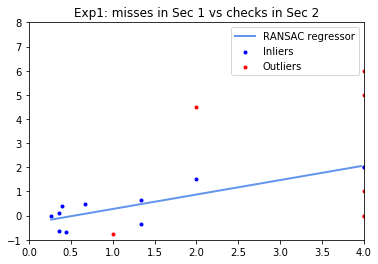

#miss 2
#check_c [ 3  7  9  5  9  4  0  6  2  1  5  3  6 16  8  6  0  2]
#check_p [ 1 10 11  4 14  5  0  6  2  1  8  0  3 13  0  4  2  2]
Estimated coefficients (true,RANSAC): 0.103754396125 0.2 3.0


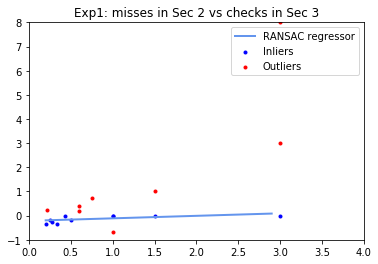

#miss 0
#check_c [ 1  3  7  6 14  6  0  2  2  1  1  1  7  7  5 13  0  2]
#check_p [ 3  7  9  5  9  4  0  6  2  1  5  3  6 16  8  6  0  2]
Estimated coefficients (true,RANSAC): 0.332868543082 0.0588235294118 1.0


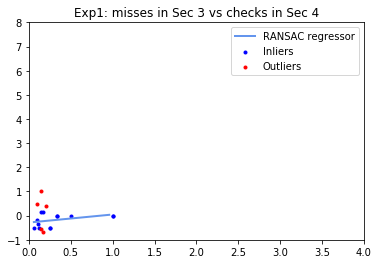

#miss 0
#check_c [ 7  6  8  6 10  5  0  5  3  3  5  0  6  8  1  6  4  1]
#check_p [ 1  3  7  6 14  6  0  2  2  1  1  1  7  7  5 13  0  2]
Estimated coefficients (true,RANSAC): 4.69642868915 0.0666666666667 1.0


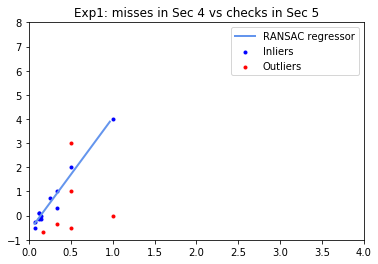

#miss 2
#check_c [ 7  6  7  5 15  5  0  1  1  2  6  0  3  9  2 16  9  2]
#check_p [ 7  6  8  6 10  5  0  5  3  3  5  0  6  8  1  6  4  1]
Estimated coefficients (true,RANSAC): -0.000137371346451 0.272727272727 3.0


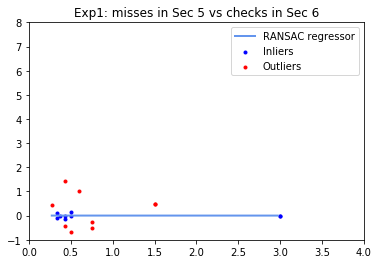

#miss 2
#check_c [ 5  3  8  4 16  5  0  4  0  0  4  2  5  5  0  8  2  3]
#check_p [ 7  6  7  5 15  5  0  1  1  2  6  0  3  9  2 16  9  2]
Estimated coefficients (true,RANSAC): 1.65651267509 0.176470588235 3.0


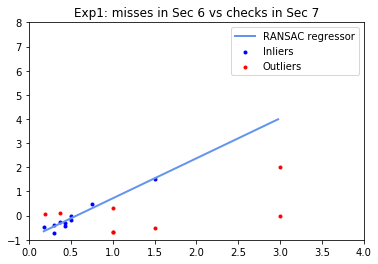

#miss 0
#check_c [ 3  3  5  4 17  5  0  3  0  3  4  1  2  6  0  5  8  2]
#check_p [ 5  3  8  4 16  5  0  4  0  0  4  2  5  5  0  8  2  3]
Estimated coefficients (true,RANSAC): 0.0499292897871 0.0588235294118 1.0


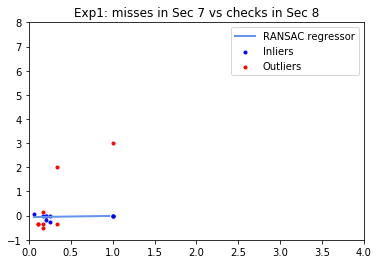

#miss 2
#check_c [ 5  0  0  2  5  0  1 14  9 10  8  0  6  2  9  8  7  4]
#check_p [ 6  0  1  1  4  1  1 10  2 12 11  4  8  2 12  0  6  7]
Estimated coefficients (true,RANSAC): 0.544836470371


NameError: name 'lw' is not defined

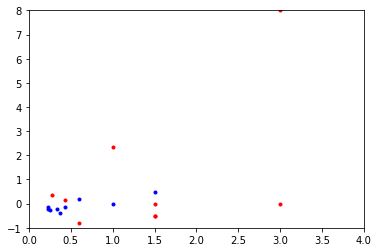

In [5]:
display(Markdown('# RQ3 User behaviour vs system performance'))
display(Markdown('## RQ3a # attended events vs system performance'))
display(Markdown('### Number of Attended Events vs System Performance (Hi FA vs Low FA ratio)'))

# exp1 within population: high/low false rate
exp1_attend_hifalse = exp1_attend[:, np.r_[0:4]].T.ravel()
exp1_attend_lofalse = exp1_attend[:, np.r_[4:8]].T.ravel()
print('Sections in exp1 with high FA: Mean:', exp1_attend_hifalse.mean(),' std:',exp1_attend_hifalse.std())
print('Sections in exp1 with low FA: Mean:', exp1_attend_lofalse.mean(),' std:',exp1_attend_lofalse.std())
print(sp.wilcoxon(exp1_attend_hifalse,exp1_attend_lofalse))

# exp2 within population: high/low false rate
exp2_attend_hifalse = exp2_attend[:, np.r_[0:4]].T.ravel()
exp2_attend_lofalse = exp2_attend[:, np.r_[4:8]].T.ravel()
print('Sections in exp2 with high FA: Mean:', exp2_attend_hifalse.mean(),' std:',exp2_attend_hifalse.std())
print('Sections in exp2 with low FA: Mean:', exp2_attend_lofalse.mean(),' std:',exp2_attend_lofalse.std())
print(sp.wilcoxon(exp2_attend_hifalse,exp2_attend_lofalse))

# within population: high/low false rate
exp_attend_hifalse = exp_attend[:, np.r_[0:4]].T.ravel()
exp_attend_lofalse = exp_attend[:, np.r_[4:8]].T.ravel()
print('Sections with high FA: Mean:', exp_attend_hifalse.mean(),' std:',exp_attend_hifalse.std())
print('Sections with low FA: Mean:', exp_attend_lofalse.mean(),' std:',exp_attend_lofalse.std())
print(sp.wilcoxon(exp_attend_hifalse,exp_attend_lofalse))
display(Markdown('### Number of Attended Events vs System Performance (with/without missed events)'))

# exp1 within population with/without misses
exp1_attend_misses = np.hstack((exp1_attend[:,0],exp1_attend[:,1],exp1_attend[:,4],exp1_attend[:,5]))
exp1_attend_nomisses = np.hstack((exp1_attend[:,2],exp1_attend[:,3],exp1_attend[:,6],exp1_attend[:,7]))
print('Sections in exp1 with Misses: Mean:', exp1_attend_misses.mean(),' std:',exp1_attend_misses.std())
print('Sections in exp1 without Misses: Mean:', exp1_attend_nomisses.mean(),' std:',exp1_attend_nomisses.std())
print(sp.wilcoxon(exp1_attend_misses,exp1_attend_nomisses))

# exp2 within population with/without misses
exp2_attend_misses = np.hstack((exp2_attend[:,0],exp2_attend[:,1],exp2_attend[:,4],exp2_attend[:,5]))
exp2_attend_nomisses = np.hstack((exp2_attend[:,2],exp2_attend[:,3],exp2_attend[:,6],exp2_attend[:,7]))
print('Sections in exp2 with Misses: Mean:', exp2_attend_misses.mean(),' std:',exp2_attend_misses.std())
print('Sections in exp2 without Misses: Mean:', exp2_attend_nomisses.mean(),' std:',exp2_attend_nomisses.std())
print(sp.wilcoxon(exp2_attend_misses,exp2_attend_nomisses))

# within population with/without misses
exp_attend_misses = np.hstack((exp_attend[:,0],exp_attend[:,1],exp_attend[:,4],exp_attend[:,5]))
exp_attend_nomisses = np.hstack((exp_attend[:,2],exp_attend[:,3],exp_attend[:,6],exp_attend[:,7]))
print('Sections with Misses: Mean:', exp_attend_misses.mean(),' std:',exp_attend_misses.std())
print('Sections without Misses: Mean:', exp_attend_nomisses.mean(),' std:',exp_attend_nomisses.std())
print(sp.wilcoxon(exp_attend_misses,exp_attend_nomisses))

display(Markdown('## RQ3a # Proportion of Attended Alerts vs system performance'))
display(Markdown('### Proportion of Attended Alerts vs System Performance (high/low false alert rate)'))

# within subject exp1: high/low false rate
exp1_attend_alert_hifalse = (exp1_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp1_attend_alert_lofalse = (exp1_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections in exp1 with high FA: Mean:',exp1_attend_alert_hifalse.mean(),' std:',exp1_attend_alert_hifalse.std())
print('Sections in exp1 with low FA: Mean:',exp1_attend_alert_lofalse.mean(),' std:',exp1_attend_alert_lofalse.std())
print(sp.wilcoxon(exp1_attend_alert_hifalse,exp1_attend_alert_lofalse))

# within subject exp2: high/low false rate
exp2_attend_alert_hifalse = (exp2_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp2_attend_alert_lofalse = (exp2_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections in exp2 with high FA: Mean:',exp2_attend_alert_hifalse.mean(),' std:',exp2_attend_alert_hifalse.std())
print('Sections in exp2 with low FA: Mean:',exp2_attend_alert_lofalse.mean(),' std:',exp2_attend_alert_lofalse.std())
print(sp.wilcoxon(exp2_attend_alert_hifalse,exp2_attend_alert_lofalse))

# within subject all exps: high/low false rate
exp_attend_alert_hifalse = (exp_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp_attend_alert_lofalse = (exp_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections with high FA: Mean:',exp_attend_alert_hifalse.mean(),' std:',exp_attend_alert_hifalse.std())
print('Sections with low FA: Mean:',exp_attend_alert_lofalse.mean(),' std:',exp_attend_alert_lofalse.std())
print(sp.wilcoxon(exp_attend_alert_hifalse,exp_attend_alert_lofalse))

display(Markdown('### Proportion of Attended Alerts vs System Performance (with/without missed events)'))

# within subject exp1: with/without misses
exp1_attend_alert_misses = (exp1_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp1_attend_alert_nomisses = (exp1_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections in exp1 with Misses: Mean:',exp1_attend_alert_misses.mean(),' Std:',exp1_attend_alert_misses.std())
print('Sections in exp1 without Misses: Mean:',exp1_attend_alert_nomisses.mean(),' Std:',exp1_attend_alert_nomisses.std())
print(sp.wilcoxon(exp1_attend_alert_misses,exp1_attend_alert_nomisses))

# within subject exp2: with/without misses
exp2_attend_alert_misses = (exp2_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp2_attend_alert_nomisses = (exp2_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections in exp2 with Misses: Mean:',exp2_attend_alert_misses.mean(),' Std:',exp2_attend_alert_misses.std())
print('Sections in exp2 without Misses: Mean:',exp2_attend_alert_nomisses.mean(),' Std:',exp2_attend_alert_nomisses.std())
print(sp.wilcoxon(exp2_attend_alert_misses,exp2_attend_alert_nomisses))

# within subject all exp: with/without misses
exp_attend_alert_misses = (exp_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp_attend_alert_nomisses = (exp_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections with Misses: Mean:',exp_attend_alert_misses.mean(),' Std:',exp_attend_alert_misses.std())
print('Sections without Misses: Mean:',exp_attend_alert_nomisses.mean(),' Std:',exp_attend_alert_nomisses.std())
print(sp.wilcoxon(exp_attend_alert_misses,exp_attend_alert_nomisses))

display(Markdown('## RQ3b Number of checks on residents vs system performance'))
display(Markdown('### Number of checks between high/low false alert rate'))

# exp1 within population: high/low false rate
exp1_check_hifalse = exp1_check[:, np.r_[0:4]].T.ravel()
exp1_check_lofalse = exp1_check[:, np.r_[4:8]].T.ravel()
print('Sections in exp1 with high FA: Mean:', exp1_check_hifalse.mean(),' std:',exp1_check_hifalse.std())
print('Sections in exp1 with low FA: Mean:',exp1_check_lofalse.mean(),' std:',exp1_check_lofalse.std())
print(sp.wilcoxon(exp1_check_hifalse,exp1_check_lofalse))

# exp2 within population: high/low false rate
exp2_check_hifalse = exp2_check[:, np.r_[0:4]].T.ravel()
exp2_check_lofalse = exp2_check[:, np.r_[4:8]].T.ravel()
print('Sections in exp2 with high FA: Mean:', exp2_check_hifalse.mean(),' std:',exp2_check_hifalse.std())
print('Sections in exp2 with low FA: Mean:',exp2_check_lofalse.mean(),' std:',exp2_check_lofalse.std())
print(sp.wilcoxon(exp2_check_hifalse,exp2_check_lofalse))

# within population: high/low false rate
exp_check_hifalse = exp_check[:, np.r_[0:4]].T.ravel()
exp_check_lofalse = exp_check[:, np.r_[4:8]].T.ravel()
print('Sections with high FA: Mean:', exp_check_hifalse.mean(),' std:',exp_check_hifalse.std())
print('Sections with low FA: Mean:',exp_check_lofalse.mean(),' std:',exp_check_lofalse.std())
print(sp.wilcoxon(exp_check_hifalse,exp_check_lofalse))

display(Markdown('### Number of checks with/without missed events'))

# exp1 within population with/without misses
exp1_check_misses = np.hstack((exp1_check[:,0],exp1_check[:,1],exp1_check[:,4],exp1_check[:,5]))
exp1_check_nomisses = np.hstack((exp1_check[:,2],exp1_check[:,3],exp1_check[:,6],exp1_check[:,7]))
print('Sections in exp1 with Misses: Mean:',exp1_check_misses.mean(),' std:',exp1_check_misses.std())
print('Sections in exp1 without Misses: Mean:',exp1_check_nomisses.mean(),' std:',exp1_check_nomisses.std())
print(sp.wilcoxon(exp1_check_misses,exp1_check_nomisses))

# exp2 within population with/without misses
exp2_check_misses = np.hstack((exp2_check[:,0],exp2_check[:,1],exp2_check[:,4],exp2_check[:,5]))
exp2_check_nomisses = np.hstack((exp2_check[:,2],exp2_check[:,3],exp2_check[:,6],exp2_check[:,7]))
print('Sections in exp2 with Misses: Mean:',exp2_check_misses.mean(),' std:',exp2_check_misses.std())
print('Sections in exp2 without Misses: Mean:',exp2_check_nomisses.mean(),' std:',exp2_check_nomisses.std())
print(sp.wilcoxon(exp2_check_misses,exp2_check_nomisses))

# within population with/without misses
exp_check_misses = np.hstack((exp_check[:,0],exp_check[:,1],exp_check[:,4],exp_check[:,5]))
exp_check_nomisses = np.hstack((exp_check[:,2],exp_check[:,3],exp_check[:,6],exp_check[:,7]))
print('Sections with Misses: Mean:',exp_check_misses.mean(),' std:',exp_check_misses.std())
print('Sections without Misses: Mean:',exp_check_nomisses.mean(),' std:',exp_check_nomisses.std())
print(sp.wilcoxon(exp_check_misses,exp_check_nomisses))

display(Markdown('### Number of checks vs missed events in the previous segment.'))
display(Markdown('Wilcoxon signed-ranked test for number of checks in consecutive segments.'))

# pearson correlation

for sec_i in range(7):
    exp_check_1st=exp_check[:n_participant-1,sec_i]
    exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
    print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

for sec_i in range(7):
    exp_check_1st=exp_check[n_participant-1:,sec_i]
    exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
    print('Exp2: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
    print('Exp2: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

# display(Markdown('### Correlation for number of checks in consecutive segments.'))

# # pearson correlation

# for sec_i in range(7):
#     exp_check_1st=exp_check[:n_participant-1,sec_i]
#     exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
#     print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
#     print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
#     pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
#     print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
#     print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

# for sec_i in range(7):
#     exp_check_1st=exp_check[n_participant-1:,sec_i]
#     exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
#     print('Exp2: Sec',sec_i+1,sec_i+2)
#     print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
#     print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
#     pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
#     print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
#     print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

display(Markdown('### plots for number of checks in consecutive segments.'))

# Correlation between # Checks and previous misses

num_miss = np.array([3,2,0,0,2,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp1_check[:,sec_i]+1)
    check_chgs = (exp1_check[:,sec_i+1]-exp1_check[:,sec_i])/(exp1_check[:,sec_i]+1)
    print('#miss',num_miss[sec_i])
    print('#check_c',exp1_check[:,sec_i+1])
    print('#check_p',exp1_check[:,sec_i])

    sys = sys.reshape((-1,1))
    check_chgs = check_chgs.reshape((-1,1))
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor(random_state=1)
    ransac.fit(sys, check_chgs)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    # Predict data of estimated models
    line_X = np.arange(sys.min(), sys.max(),0.1)[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    
    print('Estimated coefficients (true,RANSAC):', ransac.estimator_.coef_[0][0], sys.min(), sys.max())

    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys[inlier_mask], check_chgs[inlier_mask], color='blue', marker='.', label='Inliers')
    plt.scatter(sys[outlier_mask], check_chgs[outlier_mask], color='red', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
    plt.legend(loc='upper right')

    plt.title('Exp1: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()

num_miss = np.array([2,2,0,0,3,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp2_check[:,sec_i]+1)
    check_chgs = (exp2_check[:,sec_i+1]-exp2_check[:,sec_i])/(exp2_check[:,sec_i]+1)
    print('#miss',num_miss[sec_i])
    print('#check_c',exp2_check[:,sec_i+1])
    print('#check_p',exp2_check[:,sec_i])
    
    sys = sys.reshape((-1,1))
    check_chgs = check_chgs.reshape((-1,1))
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor(random_state=1)
    ransac.fit(sys, check_chgs)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    print('Estimated coefficients (true,RANSAC):', ransac.estimator_.coef_[0][0])

    # Predict data of estimated models
    line_X = np.arange(sys.min(), sys.max(),0.1)[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys[inlier_mask], check_chgs[inlier_mask], color='blue', marker='.', label='Inliers')
    plt.scatter(sys[outlier_mask], check_chgs[outlier_mask], color='red', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
    plt.legend(loc='upper right')
    
    plt.title('Exp2: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()


In [ ]:
display(Markdown('# RQ4 User Behaviour versus Self-reported Trust'))
display(Markdown('## RQ4a Proportion of attends and self-reported trust'))
display(Markdown('### Correlation between Number of Attended Events and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attend.T.ravel()))

display(Markdown('### Correlation between Proportion of Attended Alerts and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attend_alert_prop.T.ravel()))

display(Markdown('### Correlation between Proportion of Attended False Alerts and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attendf_prop.T.ravel()))

display(Markdown('## RQ4b Number of checks on residents versus self-reported trust'))
display(Markdown('### Correlation between Number of Checks and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_check.T.ravel()))

display(Markdown('## RQ4c Changes in OK reports vs behaviour and self-reported trust'))
# display(Markdown('### Correlation between Number of Checks and Trust Scores'))

# Correlation between selected report frequency and Number of attends
# Correlation between selected report frequency and Number of checks
# Correlation between selected report frequency and Trust Scores

# count of frequency changes
freq_type = ['Disabled','Low','High']
freq_cnt = {key: 0 for key in freq_type}
freq_cnt.update(Counter(exp_freq.ravel()))
print(freq_cnt)

def HLD(exp_, exp_freq, sec_idx=0):
    if sec_idx==0:
        exp_ = exp_[:, np.r_[0,2,4,6]].T.ravel()
    else:
        exp_ = exp_[:, np.r_[1,3,5,7]].T.ravel()
        
    exp_H = exp_[exp_freq.T.ravel()=='High']
    exp_LD = exp_[exp_freq.T.ravel()!='High']
    print('H Mean:',exp_H.mean(),' Std:',exp_H.std())
    print('LD Mean:',exp_LD.mean(),' Std:',exp_LD.std())
    print(sp.ranksums(exp_H, exp_LD))

print('\nWith previous section\n')
print('Proportion Alert:')
HLD(exp_attend_alert_prop, exp_freq,0)
print('# Check:')
HLD(exp_check, exp_freq,0)
print('Proportion attended False Alert:')
HLD(exp_attendf_prop, exp_freq,0)

print('\nWith next section\n')
print('Proportion Alert:')
HLD(exp_attend_alert_prop, exp_freq,1)
print('# Check:')
HLD(exp_check, exp_freq,1)
print('Proportion attended False Alert:')
HLD(exp_attendf_prop, exp_freq,1)

In [ ]:
display(Markdown('## RQ5. User behaviour versus self-perceived behaviour'))
display(Markdown('How often did you attend to the system\'s alerts?'))
# Answers to Q1
pstq_Q1 = exp_pstq[:,np.arange(0,40,10)].ravel()
# sum of attend proportion of two sections within the same system
sum_attend_prop = np.sum(exp_attend_alert_prop.reshape((-1, 2)), axis=1)  
# spearman correlation
print(sp.spearmanr(pstq_Q1, sum_attend_prop))

display(Markdown('How often did you check on the residents?'))
# Answers to Q1
pstq_Q2 = exp_pstq[:,np.arange(1,40,10)].ravel()
# sum of attend proportion of two sections within the same system
sum_check = np.sum(exp_check.reshape((-1, 2)), axis=1)  
# spearman correlation
print(sp.spearmanr(pstq_Q2, sum_check))

display(Markdown('## RQ6. Confidence in user-system team performance'))
Q_id = np.array([5,6,10])-1 # read question list from Qs
pstq_id = np.array([])



for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_id = np.hstack((pstq_id, pstq.ravel()))
    
    print('Q',ids+1,': ',Qs[ids],sep="")
    print('Overall Mean:', pstq.mean(),' Std:',pstq.std(),' Median:',np.median(pstq))
    
    y = np.array(pstq.mean(axis=0))
    e = np.array(pstq.std(axis=0))
    x = np.arange(len(y))+1
    
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.yticks(np.arange(6))
    axes = plt.gca()
    for xy in zip(x, y):
        axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    plt.show()
    print('correlation with loss from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(Total_loss.reshape((-1, 2)),axis=1)),'\n')
    print('correlation with # attended events from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_attend.reshape((-1, 2)),axis=1)),'\n')    
    print('correlation with proportion of attend from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_attend_alert_prop.reshape((-1, 2)),axis=1)),'\n')
    print('correlation with # check from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_check.reshape((-1, 2)),axis=1)),'\n')

pstq_id = pstq_id.reshape((-1,len(pstq.ravel())))
    
def corrcoefp(matrix):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            #r_, p_ = sp.pearsonr(matrix[i], matrix[j])
            r_, p_ = sp.spearmanr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = np.around(r_, decimals=5)
            p[i, j] = p[j, i] = p_
    return r, p

r,p = corrcoefp(pstq_id)

r = np.vstack((Q_id+1,r))
r = np.hstack((np.insert(Q_id+1,0,0)[np.newaxis].T,r)) # note: need to add one more dimension so it can transpose
p = np.vstack((Q_id+1,p))
p = np.hstack((np.insert(Q_id+1,0,0)[np.newaxis].T,p))         
print('Spearman r between questions:')
print(np.around(r, decimals=3),'\n')
print('Spearman p-value between questions:')
print(np.around(p, decimals=3))

In [ ]:
display(Markdown('## RQ7 Number of Admin Tasks and Earnings from Admin Tasks'))

# exp1 mean & std
x = np.arange(8)+1
y = np.array(exp1_admin.mean(axis=0))
e = np.array(exp1_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Admin Tasks: Experiment 1 (ABCD)")    
plt.show()

# exp2 mean & std
x = np.arange(8)+1
y = np.array(exp2_admin.mean(axis=0))
e = np.array(exp2_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Admin Tasks: Experiment 2 (CDAB)")    
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_admin.mean(axis=0))
e = np.array(exp_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Admin tasks: Both Experiments (in order of ABCD)")    
plt.show()


display(Markdown('### Correlation between # Attended Admins vs proportion of Attended Alerts'))
# pearson correlation
pear_ = sp.pearsonr(exp_admin.T.ravel(), exp_attend_alert_prop.ravel())
print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
print(sp.spearmanr(exp_admin.T.ravel(), exp_attend_alert_prop.ravel()))

display(Markdown('### Correlation between # Attended Admins vs # Checks'))
# pearson correlation
pear_ = sp.pearsonr(exp_admin.T.ravel(), exp_check.ravel())
print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
print(sp.spearmanr(exp_admin.T.ravel(), exp_check.ravel()))

display(Markdown('### Correlation between # Attended Admins vs # Attended events'))
# pearson correlation
pear_ = sp.pearsonr(exp_admin.T.ravel(), exp_attend.ravel())
print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
print(sp.spearmanr(exp_admin.T.ravel(), exp_attend.ravel()))

display(Markdown('### Correlation between # Attended Admins vs # Attended Alerts'))
# pearson correlation
pear_ = sp.pearsonr(exp_admin.T.ravel(), exp_attend_alert.ravel())
print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
print(sp.spearmanr(exp_admin.T.ravel(), exp_attend_alert.ravel()))

In [ ]:
display(Markdown('## RQ8 Earnings & Losses'))
display(Markdown('### Admin Earnings'))


exp1_fnl_balance = exp1_data_T.values[1:n_participant,244:252].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:n_participant,244:252].astype(int)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# correct cards:$4; wrong cards: $4; use (total admin - 2x wrong admin)x$4 to get net profit
exp1_Earnings_admin = 4*(exp1_admin - 2*exp1_admin_w)
exp2_Earnings_admin = 4*(exp2_admin - 2*exp2_admin_w)
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)

# reverse engineering to find total losses from monitoring system
exp1_Total_loss = exp1_fnl_balance - exp1_Earnings_admin - 150
exp2_Total_loss = exp2_fnl_balance - exp2_Earnings_admin - 150
Total_loss = exp_fnl_balance - Earnings_admin - 150


############################################ earnings
# exp1
x = np.arange(8)+1
y = np.array(exp1_Earnings_admin.mean(axis=0))
e = np.array(exp1_Earnings_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([100,220])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Admin earnings: Experiment One (ABCD)")    
plt.show()

# exp2
x = np.arange(8)+1
y = np.array(exp2_Earnings_admin.mean(axis=0))
e = np.array(exp2_Earnings_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([100,220])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Admin earnings: Experiment Two (CDAB)")    
plt.show()

# overall
x = np.arange(8)+1
y = np.array(Earnings_admin.mean(axis=0))
e = np.array(Earnings_admin.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([100,220])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Admin earnings: Both Experiments (ABCD)")    
plt.show()

print('\nEarnings: Between high FAs and low FAs \n')
Earnings_admin_hi = exp_check[:, np.r_[0,1,4,5]].T.ravel()
Earnings_admin_lo = exp_check[:, np.r_[1,3,5,7]].T.ravel()
print(sp.wilcoxon(Earnings_admin_hi,Earnings_admin_lo))

print('\nEarnings: Between same segment across two experiments \n')
for idx in range(8):
#     print(Earnings_admin[:(n_participant-1),idx])
#     print(Earnings_admin[(n_participant-1):,idx])
    print(sp.wilcoxon(Earnings_admin[:(n_participant-1),idx],\
                       Earnings_admin[(n_participant-1):,idx]))
    
print('\nEarnings: Between consecutive segments in same system setting \n')
    
for idx in range(7):
    print('Exp1: between section',idx+1,'and',idx+2)
    print(sp.wilcoxon(Earnings_admin[:(n_participant-1),idx],\
                       Earnings_admin[:(n_participant-1),idx+1]))
    
for idx in range(7):
    print('Exp2: between section',idx+1,'and',idx+2)
    print(sp.wilcoxon(Earnings_admin[(n_participant-1):,idx],\
                       Earnings_admin[(n_participant-1):,idx+1]))

display(Markdown('### Total losses from events/alerts/attend/checks/misses'))

############################################ losses
# exp1
x = np.arange(8)+1
y = np.array(exp1_Total_loss.mean(axis=0))
e = np.array(exp1_Total_loss.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-700,100])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Total losses: Experiment One (ABCD)")    
plt.show()

# exp2
x = np.arange(8)+1
y = np.array(exp2_Total_loss.mean(axis=0))
e = np.array(exp2_Total_loss.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-700,100])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Total losses: Experiment Two (CDAB)")    
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(Total_loss.mean(axis=0))
e = np.array(Total_loss.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-700,100])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Total losses: Both Experiments (in order of ABCD)")    
plt.show()

print('\nLosses: Between same segment across two experiments \n')

for idx in range(8):
#     print(Total_loss[:(n_participant-1),idx])
#     print(Total_loss[(n_participant-1):,idx])
    print(sp.wilcoxon(Total_loss[:(n_participant-1),idx],\
                       Total_loss[(n_participant-1):,idx]))

print('\nLosses: Between consecutive segments in same system setting \n')
    
for idx in range(7):
    print('Exp1: between section',idx+1,'and',idx+2)
    print(sp.wilcoxon(Total_loss[:(n_participant-1),idx],\
                       Total_loss[:(n_participant-1),idx+1]))
for idx in range(7):
    print('Exp2: between section',idx+1,'and',idx+2)
    print(sp.wilcoxon(Total_loss[(n_participant-1):,idx],\
                       Total_loss[(n_participant-1):,idx+1]))
    
display(Markdown('### Final balance from the experiments'))

########################################### total balance
# exp1
x = np.arange(8)+1
y = np.array(exp1_fnl_balance.mean(axis=0))
e = np.array(exp1_fnl_balance.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-400,400])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Final balance: Experiment One (ABCD)")    
plt.show()

# exp2
x = np.arange(8)+1
y = np.array(exp2_fnl_balance.mean(axis=0))
e = np.array(exp2_fnl_balance.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-400,400])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Final balance: Experiment Two (CDAB)")    
plt.show()

# overall mean & std
x = np.arange(8)+1
y = np.array(exp_fnl_balance.mean(axis=0))
e = np.array(exp_fnl_balance.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([-400,400])
for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Final balance: Both Experiments (in order of ABCD)")    
plt.show()



In [ ]:
display(Markdown('## RQ9 Trust-Propensity Questionnaire'))

Qs_propensity = ['I usually trust machines until there is a reason not to',
'For the most part; I distrust machines',
'In general; I would rely on a machine to assist me',
'My tendency to trust machines is high',
'It is difficult for me to trust machines to do their job',
'I am likely to trust a machine even when I have little knowledge about it']

for qid in range(len(Qs_propensity)):
    print('Q',qid+1,': ',Qs_propensity[qid],sep='')

# overall mean & std
x = np.arange(6)+1
y = np.array(exp_prop.mean(axis=0))
e = np.array(exp_prop.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Propensity Questions: Both Experiments (ABCD) \n 1: strongly disagree 5 strongly agree")    
plt.show()


display(Markdown('### Among trust-propensity questions:'))
print('\033[1m'+'Hypotheses:\n')
print('Q1 inversely correlated with 2 and 5, directly correlated with 3, 4 and 6.')
print('Q2 directly correlated with 5, inversely correlated with 3, 4 and 6.')
print('Q3 directly correlated with 4 and 6, inversely correlated with 5.')
print('Q4 directly correlated with 6, inversely correlated with 5.')
print('Q5 inversely correlated with 6.'+'\033[0m'+'\n')
print('Correlation test.\n')

# def corrcoefp(matrix):
#     r = np.corrcoef(matrix)
#     rf = r[np.triu_indices(r.shape[0], 1)]
#     df = matrix.shape[1] - 2
#     ts = rf * rf * (df / (1 - rf * rf))
#     pf = ss.betainc(0.5 * df, 0.5, df / (df + ts))
#     p = np.zeros(shape=r.shape)
#     p[np.triu_indices(p.shape[0], 1)] = pf
#     p[np.tril_indices(p.shape[0], -1)] = pf
#     p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
#     return r, p

def corrcoefp(matrix):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            #r_, p_ = sp.pearsonr(matrix[i], matrix[j])
            r_, p_ = sp.spearmanr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = np.around(r_, decimals=5)
            p[i, j] = p[j, i] = p_
    return r, p

r,p = corrcoefp(exp_prop.T)

r = np.vstack((np.arange(6)+1,r))
r = np.hstack((np.arange(7)[np.newaxis].T,r)) # note: need to add one more dimension so it can transpose
p = np.vstack((np.arange(6)+1,p))
p = np.hstack((np.arange(7)[np.newaxis].T,p))         
print('Spearman r between questions:')
print(np.around(r, decimals=3),'\n')
print('Spearman p-value between questions:')
print(np.around(p, decimals=3))

display(Markdown('### Between trust-propensity questions and trust:'))
print('\033[1m'+'Hypotheses:\n')
print('Q1 3 4 6 directly correlated with self-reported trust and proportion of attends, inversely correlated with number of checks.')
print('Q2 5 inversely correlated with self-reported trust and proportion of attends, directly correlated with number of checks.'+'\033[0m'+'\n')
print('Below summarises the correlation between answers and four user behavior trust:')
print('\033[1m'+'Trust Score, # events, Prop Alert and # Check'+'\033[0m'+'\n')

# pearson correlation             
for qid in range(len(Qs_propensity)):
    print('Q',qid+1,': ',Qs_propensity[qid],sep='')
    user_trust = np.vstack((exp_prop[:,qid],\
                 np.sum(exp_trust,axis=1),\
                 np.sum(exp_attend,axis=1),\
                 np.sum(exp_attend_alert_prop,axis=1),\
                 np.sum(exp_check,axis=1)))
    r,p = corrcoefp(user_trust)
    result = np.vstack((np.around(r[0,1:],decimals=3),np.around(p[0,1:],decimals=3)))
    print('    r:',result[0],sep='')
    print('    p:',result[1],sep='')

In [ ]:
########################### Pre-game questionnaire ################################
display(Markdown('# RQ10 Pre-game questionnaire'))

Qs_pre =['What is your gender?',
'Please indicate your age',
'Please indicate your ethnic background',
'What is your highest level of education?',
'How would you rate your technology expertise?',
'How do you feel about including technology in your life?',
'How would you rate your experience with smart devices?']

opts =[['Male','Female','Other'],
['Under 30','30','40','41-50','51-60','61-70','Over 70'],
['African','AAPI','Caucasian','East Asian','HAL','Middle Eastern','South Asian','Other'],
['Primary','Secondary','Short-cycle','Bachelor','Master,','PhD','Other'],
['Low','Medium','High'],
['Dislike','Neutral','Like'],
['Low','Medium','High']]

for idx in range(len(Qs_pre)): 
    
    ans = np.arange(len(opts[idx]))+1
    cnt = {key: 0 for key in ans}
    cnt.update(Counter(exp_demo[:,idx]))
    plt.bar(ans,list(cnt.values()))
    plt.xticks(ans, opts[idx], rotation=17)
    plt.title(Qs_pre[idx])
    plt.ylabel("Count")
    plt.show()

In [ ]:
########################### Post-game questionnaire ################################
display(Markdown('# RQ11 Post-game questionnaire'))

Qs_post =['How difficult was your admin job in the experiment?',
'How engaged were you with the experiment?',
'How stressful was the experiment?',
'How important to do well in the card game?',
'How important the elderly residents are ok?',
'How did you determine your trust to monitoring system?',
'Was the tutorial video sufficiently helpful?']


for qid in range(len(Qs_post)):
    print('Q',qid+1,': ',Qs_post[qid],sep='')
    
print('\n'+'\033[1m'+'Hypotheses:')
print('Q4 is directly correlated with income (sum of all).')
print('Q5 is inversely correlated with losses (sum of all).'+'\033[0m'+'\n')

print('Q4 vs income:')
print('    Answers to Q4: Mean:', exp_pgq[:,3].mean(),' std:',exp_pgq[:,3].std())
print('    Total income:  Mean:',np.sum(Earnings_admin, axis=1).mean(),' std:',np.sum(Earnings_admin, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,3], np.sum(Earnings_admin, axis=1)))
      
print('Q4 vs losses:')
print('    Answers to Q4: Mean:', exp_pgq[:,3].mean(),' std:',exp_pgq[:,3].std())
print('    Total losses:  Mean:', np.sum(Total_loss, axis=1).mean(),' std:',np.sum(Total_loss, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,3], np.sum(Total_loss, axis=1)))
      
print('Q5 vs income:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total income:  Mean:',np.sum(Earnings_admin, axis=1).mean(),' std:',np.sum(Earnings_admin, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(Earnings_admin, axis=1)))
      
print('Q5 vs losses:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total losses:  Mean:',np.sum(Total_loss, axis=1).mean(),' std:',np.sum(Total_loss, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(Total_loss, axis=1)))

print('Q5 vs # check:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total # check:  Mean:',np.sum(exp_attend_alert_prop, axis=1).mean(),' std:',np.sum(exp_attend_alert_prop, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(exp_attend_alert_prop, axis=1)))

print('Q5 vs proportion of attended alert:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total proportion of attended alert:  Mean:',np.sum(exp_check, axis=1).mean(),' std:',np.sum(exp_check, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(exp_check, axis=1)))

opts =[['Very Difficult','Difficult','Fine','Easy','Very Easy'],
['Quite bored','A little bored','Neutral','A little engaged','Quite engaged'],
['Quite Stressful','A little stressful','Not at all'],
['Not at all','A little','Moderately','Very'],
['Not at all','A little','Moderately','Very'],
['The game','Interim report','Both','Other'],
['No','Yes']]


for idx in range(len(Qs_post)): 
    
    ans = np.arange(len(opts[idx]))+1
    cnt = {key: 0 for key in ans}
    cnt.update(Counter(exp_pgq[:,idx]))
    plt.bar(ans,list(cnt.values()))
    plt.xticks(ans, opts[idx], rotation=17)
    plt.title(Qs_post[idx])
    plt.ylabel("Count")
    plt.show()